#### Data_Exploratory and pre processing 

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df_philly = pd.read_csv('df_philly_cleaned.csv', index_col = 0)
df_york = pd.read_csv('df_york_cleaned.csv', index_col = 0)

In [182]:
df_philly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 2452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_title_texts  1814 non-null   object 
 1   post_prices       1814 non-null   float64
 2   sqfts             1814 non-null   float64
 3   post_links        1814 non-null   object 
 4   bedroom_counts    1814 non-null   float64
 5   post_hoods        1814 non-null   object 
 6   post_timing       1814 non-null   object 
 7   No_of_bathrooms   1814 non-null   float64
 8   latitude          1814 non-null   float64
 9   longitude         1814 non-null   float64
 10  pet               1814 non-null   object 
 11  laundry           1814 non-null   object 
 12  parking           1814 non-null   object 
 13  Apartment_type    1814 non-null   object 
dtypes: float64(6), object(8)
memory usage: 212.6+ KB


In [183]:
df_york.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 0 to 2924
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_title_texts  2322 non-null   object 
 1   post_prices       2322 non-null   float64
 2   sqfts             2322 non-null   float64
 3   post_links        2322 non-null   object 
 4   bedroom_counts    2322 non-null   float64
 5   post_hoods        2322 non-null   object 
 6   post_timing       2322 non-null   object 
 7   No_of_bathrooms   2322 non-null   float64
 8   latitude          2322 non-null   float64
 9   longitude         2322 non-null   float64
 10  pet               2322 non-null   object 
 11  laundry           2322 non-null   object 
 12  parking           2322 non-null   object 
 13  Apartment_type    2322 non-null   object 
dtypes: float64(6), object(8)
memory usage: 272.1+ KB


## To get the information about the address from the lattitude and longitude

In [190]:
import geopy
import pandas as pd


def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']


geolocator = geopy.Nominatim(user_agent='shiva')

df_york['address'] = df_york.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')

In [196]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    return location.raw['address']


geolocator = geopy.Nominatim(user_agent='shiva')
df_philly['address'] = df_philly.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')

### Save the newly obtained address data so we don't need to pull from geopy all the time.

In [192]:
df_york_ad = pd.io.json.json_normalize(df_york['address'])

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [197]:
df_phil_ad = pd.io.json.json_normalize(df_philly['address'])

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [356]:
df_philly_conca = pd.concat([df_philly, df_phil_ad], axis = 1)

In [357]:
df_york_conca = pd.concat([df_york, df_york_ad], axis = 1)

In [358]:
df_york_stack = pd.DataFrame(np.hstack([df_york, df_york_ad]))
df_philly_stack = pd.DataFrame(np.hstack([df_philly, df_phil_ad]))

In [359]:
df_york_stack.columns = df_york_conca.columns
df_philly_stack.columns= df_philly_conca.columns

In [360]:
df_philly_stack.to_csv("df_philly_address.csv")
df_york_stack.to_csv("df_york_address.csv")

### open the newly saved file with address

In [733]:
df_philly_address_co = pd.read_csv("df_philly_address.csv", index_col = 0)
df_york_address_co = pd.read_csv("df_york_address.csv", index_col = 0)

### Drop unwanted columns

In [734]:
philly_drop_columns = ['neighbourhood', 'city', 'county', 'state',
        'country', 'country_code', 'house_number', 'residential',
       'suburb', 'amenity', 'retail', 'town', 'railway', 'shop', 'village',
       'hamlet', 'building', 'tourism', 'place', 'township', 'leisure',
       'historic', 'office', 'borough', 'commercial','post_title_texts',
        'post_links', 'address', 'road', 'post_hoods', 'post_links']

In [735]:
york_drop_columns = ['address', 'building', 'house_number', 'road', 'neighbourhood',
       'suburb', 'county', 'city', 'state', 'country',
       'country_code', 'city_district', 'town', 'highway', 'hamlet', 'amenity',
       'office', 'residential', 'railway', 'shop', 'leisure', 'historic',
       'village', 'tourism', 'man_made', 'municipality', 'place','post_title_texts',
       'commercial', 'post_links', 'post_hoods']

In [736]:
df_philly_address_co = df_philly_address_co.drop(columns = philly_drop_columns)
df_york_address_co = df_york_address_co.drop(columns = york_drop_columns)

In [737]:
df_philly_address_co.columns

Index(['post_prices', 'sqfts', 'bedroom_counts', 'post_timing',
       'No_of_bathrooms', 'latitude', 'longitude', 'pet', 'laundry', 'parking',
       'Apartment_type', 'postcode'],
      dtype='object')

In [738]:
df_philly_address_co.columns

Index(['post_prices', 'sqfts', 'bedroom_counts', 'post_timing',
       'No_of_bathrooms', 'latitude', 'longitude', 'pet', 'laundry', 'parking',
       'Apartment_type', 'postcode'],
      dtype='object')

In [739]:
df_philly_address_co[df_philly_address_co['postcode'].isna()]

,post_prices,sqfts,bedroom_counts,post_timing,No_of_bathrooms,latitude,longitude,pet,laundry,parking,Apartment_type,postcode
290,1515.0,813.000000,1.0,2021-02-18 12:05,1.0,40.0,-75.276,no pet,in unit,off-street,multi,NaN
856,1620.0,859.334507,1.0,2021-02-17 16:39,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
899,1860.0,1077.385776,2.0,2021-02-17 15:56,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
1149,1860.0,1077.385776,2.0,2021-02-17 11:35,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
1679,1860.0,1077.385776,2.0,2021-02-16 16:55,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN
1727,1620.0,859.334507,1.0,2021-02-16 15:55,1.0,40.0,-75.276,both pets,in unit,off-street,multi,NaN


In [740]:
df_philly_address_co= df_philly_address_co.dropna()

In [741]:
df_philly_address_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 1813
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_prices      1808 non-null   float64
 1   sqfts            1808 non-null   float64
 2   bedroom_counts   1808 non-null   float64
 3   post_timing      1808 non-null   object 
 4   No_of_bathrooms  1808 non-null   float64
 5   latitude         1808 non-null   float64
 6   longitude        1808 non-null   float64
 7   pet              1808 non-null   object 
 8   laundry          1808 non-null   object 
 9   parking          1808 non-null   object 
 10  Apartment_type   1808 non-null   object 
 11  postcode         1808 non-null   object 
dtypes: float64(6), object(6)
memory usage: 183.6+ KB


## create 20 clusters using k-means clustering algorithm.

#### one outlier in latitude and longitude still needed to remove

In [742]:
df_york_address_co = df_york_address_co[df_york_address_co['latitude']>39.8]

In [743]:
kmeans = KMeans(20)
clusters = kmeans.fit_predict(df_philly_address_co[['latitude','longitude']])
df_philly_address_co['pickup cluster'] = kmeans.predict(df_philly_address_co[['latitude','longitude']])

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

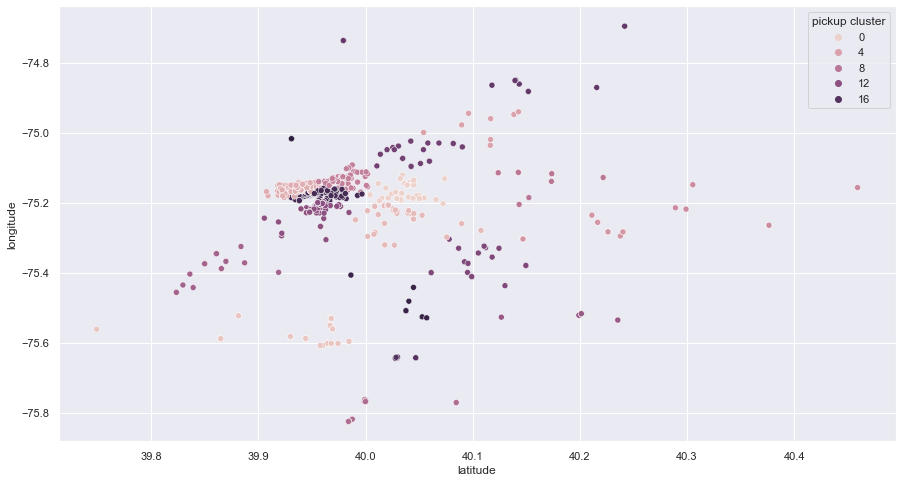

In [744]:
plt.figure(figsize = (15,8))
sns.scatterplot(df_philly_address_co['latitude'], df_philly_address_co['longitude'], hue = df_philly_address_co['pickup cluster'])

In [745]:
kmeans = KMeans(20)
clusters = kmeans.fit_predict(df_york_address_co[['latitude','longitude']])
df_york_address_co['pickup cluster'] = kmeans.predict(df_york_address_co[['latitude','longitude']])

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

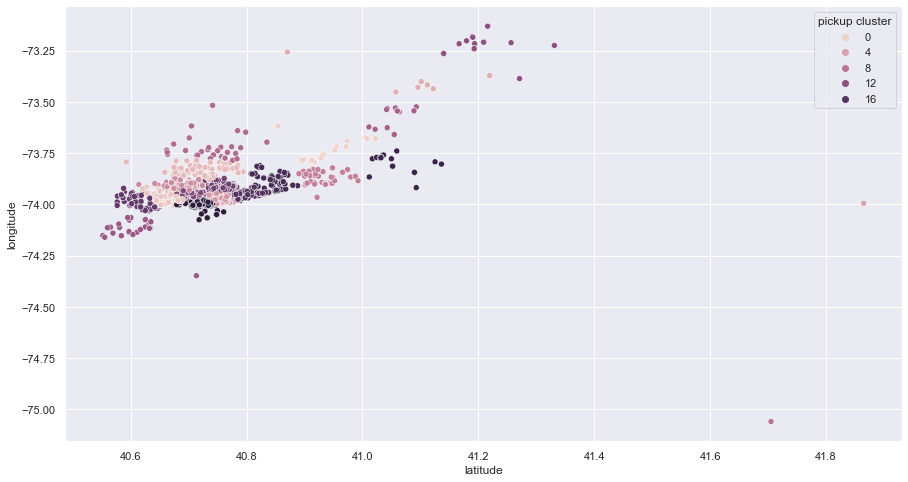

In [746]:
plt.figure(figsize = (15,8))
sns.scatterplot(df_york_address_co['latitude'], df_york_address_co['longitude'], hue = df_york_address_co['pickup cluster'])
#plt.xlim(40.5, 41.5)
#plt.ylim(-74.5, -73)

In [747]:
df_york_address_co = df_york_address_co.drop(columns = ['latitude','longitude'])
df_philly_address_co = df_philly_address_co.drop(columns = ['latitude','longitude'])

# Some exploratory 

In [748]:
df_york_address_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 0 to 2321
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_prices      2321 non-null   float64
 1   sqfts            2321 non-null   float64
 2   bedroom_counts   2321 non-null   float64
 3   post_timing      2321 non-null   object 
 4   No_of_bathrooms  2321 non-null   float64
 5   pet              2321 non-null   object 
 6   laundry          2321 non-null   object 
 7   parking          2321 non-null   object 
 8   Apartment_type   2321 non-null   object 
 9   postcode         2321 non-null   object 
 10  pickup cluster   2321 non-null   int32  
dtypes: float64(4), int32(1), object(6)
memory usage: 208.5+ KB


In [749]:
df_philly_address_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 1813
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   post_prices      1808 non-null   float64
 1   sqfts            1808 non-null   float64
 2   bedroom_counts   1808 non-null   float64
 3   post_timing      1808 non-null   object 
 4   No_of_bathrooms  1808 non-null   float64
 5   pet              1808 non-null   object 
 6   laundry          1808 non-null   object 
 7   parking          1808 non-null   object 
 8   Apartment_type   1808 non-null   object 
 9   postcode         1808 non-null   object 
 10  pickup cluster   1808 non-null   int32  
dtypes: float64(4), int32(1), object(6)
memory usage: 162.4+ KB


### Apartment type comparison between two cities
Newyork has the maximum number of listing for multi (apartment, condo, flat, loft, manufactured, assisted living)
 while Philadelphia has the maximum number of listing for single (house, townhouse, cottage/cabin)

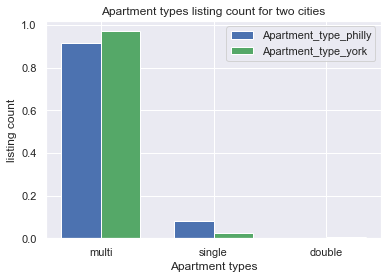

In [750]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
philly_apt = ax.bar(index, df_philly_address_co["Apartment_type"].value_counts(normalize = True), bar_width,
                label= "Apartment_type_philly")

york_apt = ax.bar(index+bar_width, df_york_address_co["Apartment_type"].value_counts(normalize = True),
                 bar_width, label= "Apartment_type_york")

ax.set_xlabel('Apartment types')
ax.set_ylabel('listing count')
ax.set_title('Apartment types listing count for two cities')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["multi", "single", "double"])
ax.legend()

plt.show()

### Comparison of apartment with pets
The both pets to no pets is higher in Newyork than in philadelphia
Cat is allowed more in Philadelphia than Newyork 

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


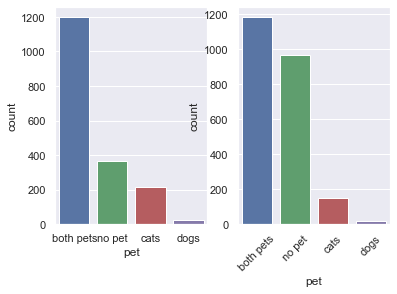

In [751]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = df_philly_address_co['pet'], ax=ax[0])
plt.xticks(rotation=45)
sns.countplot(x = df_york_address_co['pet'], ax=ax[1])
fig.show()

### Pets in different Apartment Type in Philly and Newyork
Philadelphia single Apartment type more flexible with pet than in Newyork

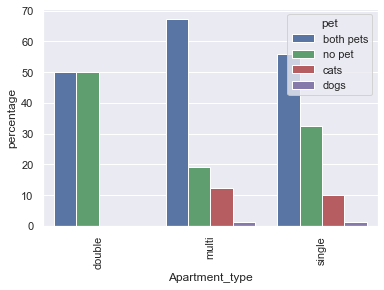

In [752]:
occupation_counts = df_philly_address_co.groupby(['Apartment_type'])['pet'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="pet", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

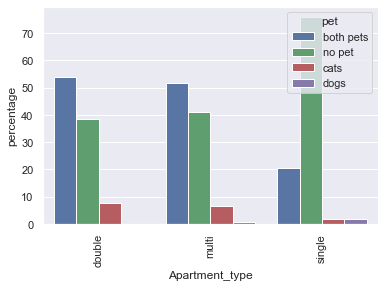

In [753]:
occupation_counts = df_york_address_co.groupby(['Apartment_type'])['pet'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="pet", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Histogram for price and Apartment size

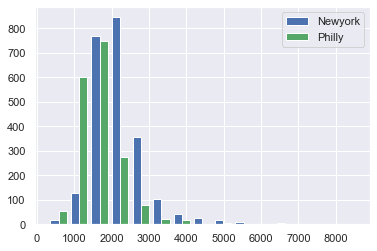

In [757]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.hist([df_york_address_co['post_prices'], df_philly_address_co['post_prices']], label=['Newyork', 'Philly'], bins = 15)
plt.legend(loc='upper right')
plt.show()

##### Histogram for post price looks similar for both philly and Newyork

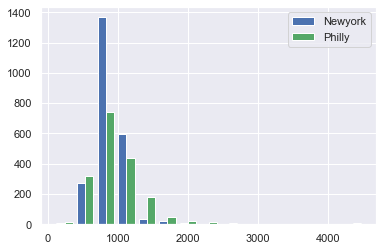

In [758]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.hist([df_york_address_co['sqfts'], df_philly_address_co['sqfts']], label=['Newyork', 'Philly'], bins = 15)
plt.legend(loc='upper right')
plt.show()

## Bathroom number in three different type of apartment in Philly

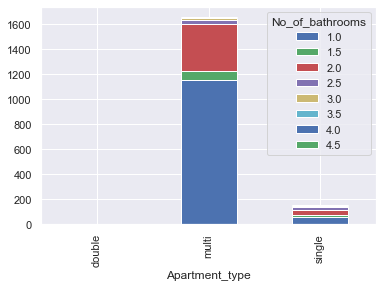

In [759]:
df_philly_address_co.groupby(['Apartment_type','No_of_bathrooms']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

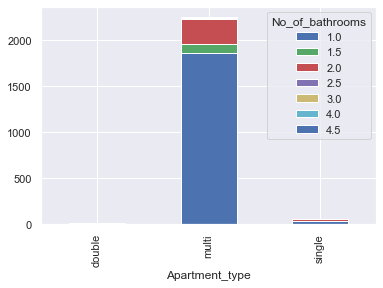

In [760]:
df_york_address_co.groupby(['Apartment_type','No_of_bathrooms']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

#### Both cities seem to have the single bathroom common for all type of apartment except for double or duplex type of apartment

## Parking

#### I did the typo while webscraping so I am fixing the typo

In [761]:
df_philly_address_co.loc[df_philly_address_co['parking']=='proctected', 'parking'] == 'protected'
df_york_address_co.loc[df_york_address_co['parking']=='proctected', 'parking'] == 'protected'

12      False
32      False
89      False
113     False
150     False
        ...  
2277    False
2300    False
2301    False
2308    False
2319    False
Name: parking, Length: 169, dtype: bool

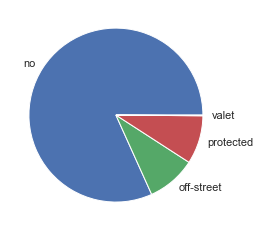

In [762]:
sums = df_york_address.parking.value_counts()
plt.pie(sums, labels=sums.index);
plt.show()

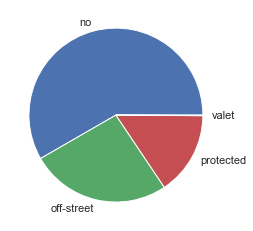

In [763]:
sums = df_philly_address.parking.value_counts()
plt.pie(sums, labels=sums.index);
plt.show()

Offstreet parking more in Phildelphia compare to newyork for the listing apartmnets
But protected parking is more in Philadelphia

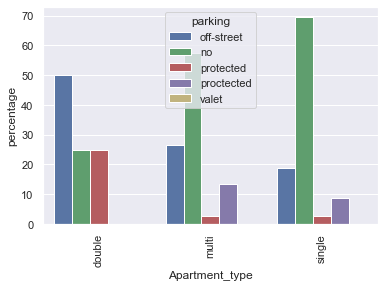

In [764]:
occupation_counts = df_philly_address_co.groupby(['Apartment_type'])['parking'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="parking", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

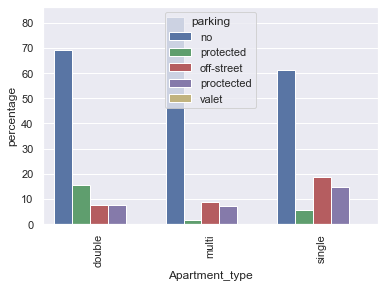

In [765]:
occupation_counts = df_york_address_co.groupby(['Apartment_type'])['parking'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('Apartment_type')
p = sns.barplot(x="Apartment_type", y="percentage", hue="parking", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

Both cities have  very few proctected parking housing list

### Distribution of mean post price according to different Zipcodes.

In [766]:
df_york_address_co.head()

,post_prices,sqfts,bedroom_counts,post_timing,No_of_bathrooms,pet,laundry,parking,Apartment_type,postcode,pickup cluster
0,2842.0,717.674641,1.0,2021-02-18 16:47,1.5,both pets,on site,no,multi,10005,19
1,1400.0,497.934783,0.0,2021-02-18 16:45,1.0,no pet,on site,off-street,multi,11435,2
2,1100.0,717.674641,1.0,2021-02-18 16:45,1.0,no pet,no laundry,protected,multi,06614,12
3,1850.0,922.373057,2.0,2021-02-18 16:44,1.5,both pets,no laundry,no,multi,11206,6
4,2084.0,922.373057,2.0,2021-02-18 16:37,1.0,no pet,on site,no,multi,10005,19


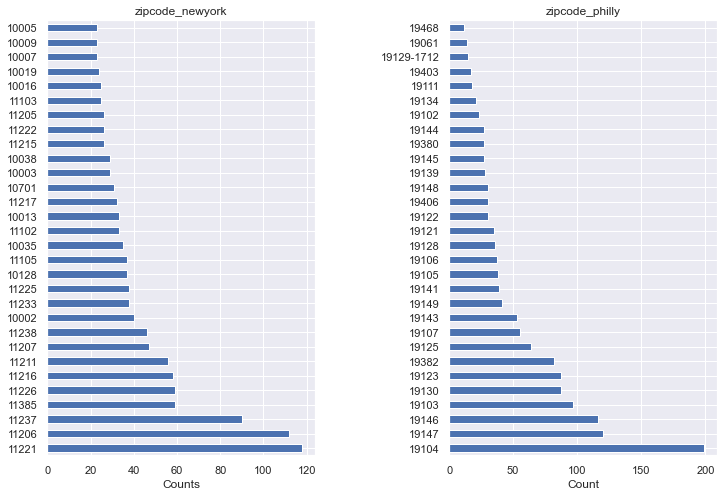

In [768]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
df_york_address_co.postcode.value_counts()[:30].plot(kind='barh', ax=ax[0])
ax[0].set_title('zipcode_newyork')
ax[0].set_xlabel('Counts')
df_philly_address_co.postcode.value_counts()[:30].plot(kind='barh', ax=ax[1])
ax[1].set_title('zipcode_philly')
ax[1].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [769]:
zipcode_price_means_york = df_york_address_co.groupby('postcode')['post_prices'].mean()
zipcode_price_means_philly = df_philly_address_co.groupby('postcode')['post_prices'].mean()

In [770]:
zipcode_price_means_philly

postcode
08002    3968.333333
08060    1287.500000
08619    2581.500000
18901    1635.000000
18914    1835.400000
            ...     
19454    1689.555556
19460    1295.000000
19462    1207.500000
19468    1755.833333
19806     950.000000
Name: post_prices, Length: 112, dtype: float64

In [771]:
zipcode_price_means_york

postcode
06468    1850.0
06604    1700.0
06605    1900.0
06606    1175.0
06608    1250.0
          ...  
11692    1900.0
11754    1600.0
11756    1200.0
12487    1000.0
12726     775.0
Name: post_prices, Length: 238, dtype: float64

### One of the zipcode is from Florida, I am removing this one 

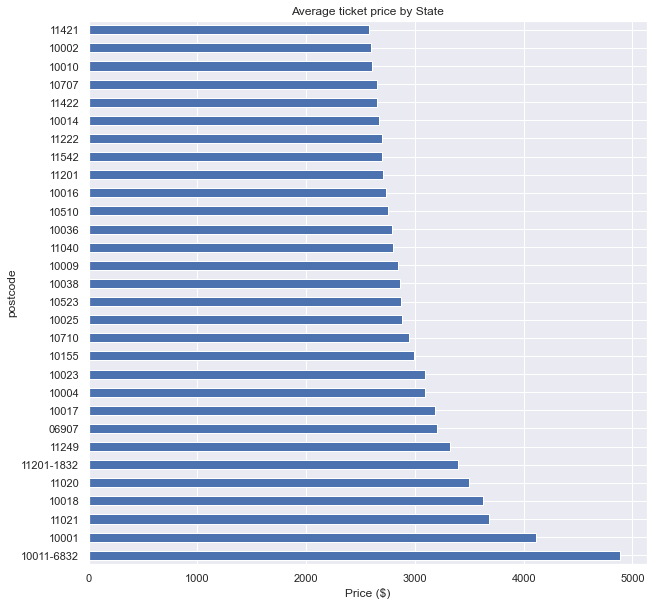

In [773]:
zipcode_price_means_york.sort_values(ascending=False)[:30].plot(kind='barh', figsize=(10, 10), title='Average ticket price by State')
plt.xlabel('Price ($)');

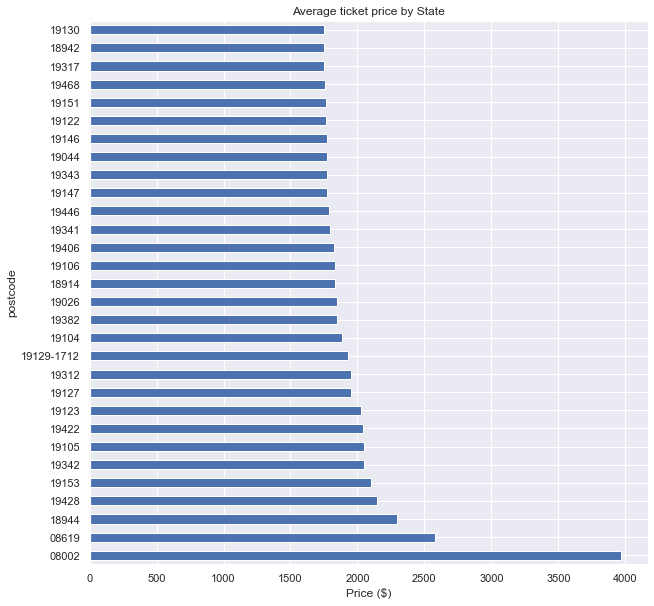

In [774]:
zipcode_price_means_philly.sort_values(ascending=False)[:30].plot(kind='barh', figsize=(10, 10), title='Average ticket price by State')
plt.xlabel('Price ($)');

We can see there are some zipcodes with average price is maximum in both cities 

#### save data for preprocessing and model training

In [775]:
df_philly_address_co.to_csv("df_philly_model.csv")
df_york_address_co.to_csv("df_york_model.csv")